In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('../peptidome.mplstyle')

import sys
sys.path.append('..')

from lib import *

In [47]:
def nndist_probability(k, N):
    K = 20**k
    d = np.arange(0, k+1)
    Nc = lambda d: 19**d * falling_factorial(k, d+1)
    Ncs = Nc(d)
    cumulative = [0]
    cumulative.extend(1-np.exp(-np.cumsum(Ncs)*N/K))
    p = np.diff(cumulative)
    return d, p

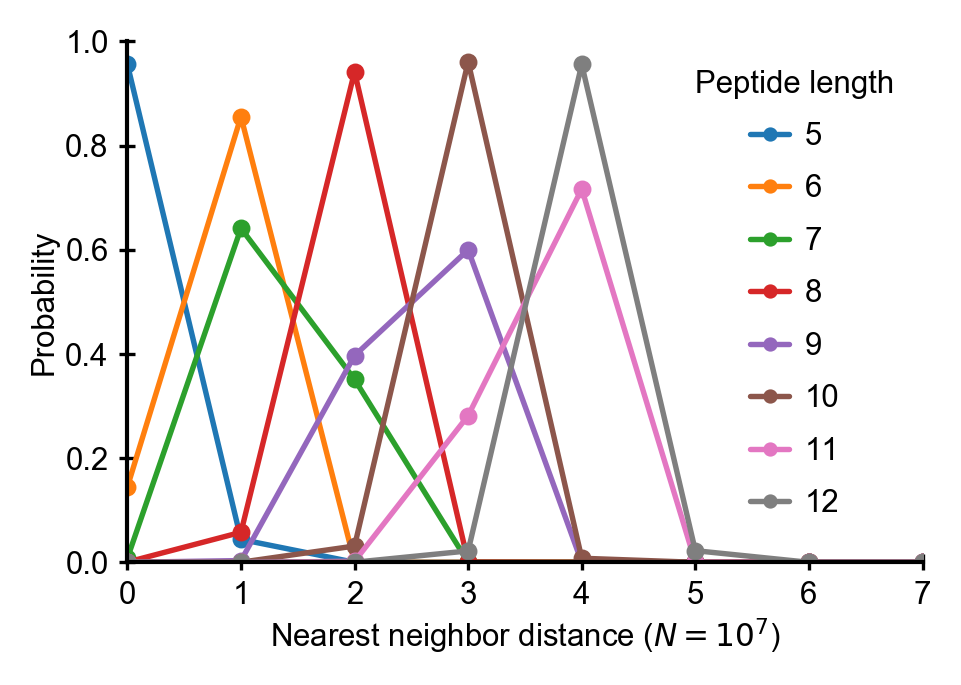

In [50]:
fig, ax = plt.subplots()
N = 1e7
for k in range(5, 13):
    d, p = nndist_probability(k, N)
    ax.plot(d, p, '-o', label=k)
ax.set_ylim(0, 1)
ax.legend(title='Peptide length')
ax.set_xlim(0, 7)
ax.set_ylabel('Probability')
ax.set_xlabel('Nearest neighbor distance ($N=10^{ %g }$)'%np.log10(N))
fig.savefig('main.png')